In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, spearmanr
np.random.seed(0)

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

%matplotlib inline


/var/folders/tt/zz8n1d_55_n6r7czk3k1qwcw0000gp/T/ipykernel_74190/763704706.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.anchored_artists import AnchoredText


In [2]:
lr_gene = pd.read_csv('../data/umn-italy/log-ratio-data.csv', index_col=0).sort_values('lr')
lr_gene.head(5)


,hkgenes,hsgenes,lr,lr_ps,age,age_average,age_range,albumin,alt,ast,...,symptoms_onset,symptoms_to_swab_days,tb,tcz,viral_load,wbc,wbc_range,disease_severity,d_dimer_log,comorb
13904.deis70,44605.0,1.0,-10.705601,-10.012476,34,Below,Below 50,29.0,63.0,NaN,...,3.9.2020,3,No,Yes,Yes,6090.0,Normal,Severe,NaN,False
13904.tosa76,124666.0,4.0,-10.347099,-10.123964,59,Above,50 to 70,19.0,46.0,67.0,...,3.2.2020,35,No,Yes,Yes,5440.0,Normal,Severe,11.088094,False
13904.capma83,26517.0,1.0,-10.185541,-9.492432,58,Below,50 to 70,30.0,68.0,141.0,...,2.25.2020,3,No,No,No,12000.0,Elevated,Severe,8.855806,True
13904.dial15,46783.0,3.0,-9.654663,-9.367002,27,Below,Below 50,26.0,65.0,63.0,...,3.10.2020,8,No,Yes,No,5140.0,Normal,Severe,6.378426,False
13904.teca45,43016.0,6.0,-8.877568,-8.723441,57,Below,50 to 70,21.0,31.0,60.0,...,3.19.2020,11,No,No,No,11780.0,Elevated,Severe,8.144098,False


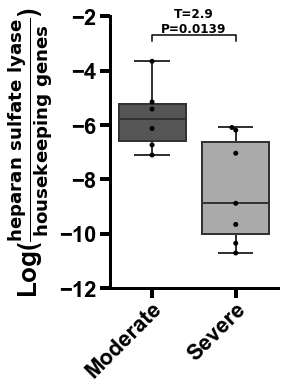

In [3]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.major.pad'] = '.1'

pal_ = {'Control':'#377eb8','COVID-19':'#e41a1c'}
label_ = 'Log($\\frac{\mathrm{heparan\,\,sulfate\,\,lyase}}{\mathrm{housekeeping\,\,genes}}$)'

fig, ax = plt.subplots(1,1, figsize=(3,5))

y_ = 'lr'
x_ = 'disease_severity'
order_map = {'Moderate':0, 'Severe':1}
order_ = ['Moderate', 'Severe']
lrdf_plot = lr_gene[lr_gene.comorb == False].dropna(subset=[y_, x_])

t_res = {}
lrs_ds = {ds_:dsdf_[y_].values for ds_, dsdf_ in lrdf_plot.groupby(x_)}
comobos = [('Moderate', 'Severe')]
for c1, c2 in comobos:
    t_stat, p_ = ttest_ind(lrs_ds[c1], lrs_ds[c2])
    t_res[(c1, c2)] =  t_stat, p_
t_resdf = pd.DataFrame(t_res).T
order_map_stats = {(order_map[k[0]], order_map[k[1]]):v for k, v in t_res.items()}

sns.swarmplot(y=y_, x=x_, 
              data=lrdf_plot, 
              color='black',
              order=order_,
              s=5,
              ax=ax)
sns.boxplot(y=y_, x=x_, 
              data=lrdf_plot,
              palette='gray',
              order=order_,
             ax=ax, linewidth=2)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .0))


ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)

ax.set_ylim(-12, -2)
ax.spines['left'].set_bounds(-12, -2)


for sp_i in ax.spines.values():
    sp_i.set_linewidth(3)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
        
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right',
                   rotation_mode="anchor")
for tick in ax.get_xticklabels():
    tick.set_fontproperties('arial')
    tick.set_ha("right")
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(22)
for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(22)

ax.set_ylabel(label_,
              fontsize=26,
              family = 'arial',
              weight='bold',
              color='black')
ax.set_xlabel('',
              fontsize=26,
              family = 'arial',
              weight='bold',
              color='black')


for i_v, ((x1, x2), (stat_, p_)) in enumerate(order_map_stats.items()):
    y, h, col = (i_v * 1) - 2.9, .2, 'k'
    ax.plot([x1, x1, x2, x2],
             [y, y+h, y+h, y],
             lw=1.5, c=col)
    if 'e' in str(p_):
        p_ = str(p_)
        p_ = p_[:3] + p_[p_.index('e'):]
        p_ = "T=%.1f\nP=%s" % (stat_, p_)
    else:
        p_ = "T=%.1f\nP=%.4f" % (stat_, p_)
    ax.text((x1+x2)*.5, y+h,
             p_, ha='center',fontsize=12,
             va='bottom', color=col)

plt.savefig('../results/figures/Fig2E.pdf' ,
            dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

In [4]:
{k:ttest_ind(df[df.severe_case == 'No'].lr.dropna(), df[df.severe_case == 'Yes'].lr.dropna())
 for k, df in lr_gene.groupby('comorb')}


{False: Ttest_indResult(statistic=2.921177004177828, pvalue=0.013908174024526663),
 True: Ttest_indResult(statistic=0.6302144372814822, pvalue=0.5461299473221861)}

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

rv = 'lr'
use_columns = ['comorb','severe_case','sex']
meta_stat = lr_gene.dropna(subset=[y_] + use_columns)

    
mod = smf.ols(formula = rv + ' ~ ' + ' + '.join(use_columns),
              data = meta_stat)
res = mod.fit()
resdf = res.summary2().tables[1]
resdf


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-4.997576,0.854022,-5.851812,0.000012,-6.785064,-3.210087
comorb[T.True],1.033805,0.709750,1.456577,0.161561,-0.451718,2.519328
severe_case[T.Yes],-1.825851,0.702433,-2.599325,0.017611,-3.296059,-0.355642
sex[T.M],-1.530825,0.800950,-1.911261,0.071176,-3.207233,0.145583
